Какой тариф в конечном итоге принесет больше денег?
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 
Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


# Первый этап чтения файлов

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm
import pylab as py
from scipy.stats import stats as st
  

In [2]:
try:
    calls = pd.read_csv('/Users/georgezagorsky/Desktop/Statistics/calls.csv')
    messages = pd.read_csv('/Users/georgezagorsky/Desktop/Statistics/messages.csv')
    internet = pd.read_csv('/Users/georgezagorsky/Desktop/Statistics/internet.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    internet = pd.read_csv('/datasets/internet.csv')

In [3]:
calls.head(3)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [4]:
calls.dtypes

id            object
call_date     object
duration     float64
user_id        int64
dtype: object

In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month'] = calls['call_date'].dt.month

In [6]:
calls_group=calls.groupby(['user_id', 'month'])['duration'].agg(['count','sum']).reset_index()
calls_group = calls_group.rename(columns={'count': 'calls_count','sum': 'minutes'})#rename
calls_group

,user_id,month,calls_count,minutes
0,1000,5,22,150.06
1,1000,6,43,158.90
2,1000,7,47,318.80
3,1000,8,52,389.87
4,1000,9,58,440.14
...,...,...,...,...
3169,1498,10,41,232.63
3170,1499,9,9,64.65
3171,1499,10,68,429.91
3172,1499,11,74,576.50


In [7]:
messages.dtypes

id              object
message_date    object
user_id          int64
dtype: object

In [8]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month'] = messages['message_date'].dt.month

In [9]:
messages_group=messages.groupby(['user_id', 'month'], as_index = False)['id'].agg(['count']).reset_index()
messages_group = messages_group.rename(columns={'count': 'count_messages'})#rename
messages_group

,user_id,month,count_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [10]:
internet.head(3)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


In [11]:
internet.dtypes

Unnamed: 0        int64
id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object

In [12]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month

In [13]:
internet_group=internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum']).reset_index()
internet_group = internet_group.rename(columns={'sum': 'count_mb'})#rename
calls.sort_values('duration', ascending = False)

,id,call_date,duration,user_id,month
95088,1241_44,2018-09-06,38.00,1241,9
178737,1446_22,2018-11-07,37.35,1446,11
5865,1017_61,2018-11-13,36.47,1017,11
39777,1099_150,2018-08-14,36.12,1099,8
60889,1153_135,2018-11-16,35.95,1153,11
...,...,...,...,...,...
45132,1113_548,2018-12-16,0.00,1113,12
144950,1365_82,2018-11-25,0.00,1365,11
144952,1365_84,2018-12-20,0.00,1365,12
45127,1113_543,2018-11-21,0.00,1113,11


In [14]:
#Объединим таблицы звонков и сообщенй по id и month пользователя и заменим названия столбцов для удобства
calls_group=calls.groupby(['user_id', 'month'])['duration'].agg(['count','sum']).reset_index()
calls_group = calls_group.rename(columns={'count': 'calls_count','sum': 'minutes'})#rename
# calls_group.columns=['user_id', 'month','calls_count', 'minutes']
messages_group=messages.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()
messages_group = messages_group.rename(columns={'count': 'count_messages'})#rename
#messages_group.columns=['user_id', 'month','count_messages']
internet_group=internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum']).reset_index()
internet_group = internet_group.rename(columns={'sum': 'count_mb'})#rename
# internet_group.columns=['user_id', 'month', 'count_gb']

In [15]:
try:
    users = pd.read_csv('/Users/georgezagorsky/Desktop/Statistics/users.csv')
except:
    users = pd.read_csv('/datasets/users.csv')

In [16]:
df = pd.merge(calls_group,messages_group, how='outer')
df = pd.merge(df,internet_group, how='outer')
df = pd.merge(df,users , how='outer')

In [17]:
df.head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,150.06,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,158.90,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,318.80,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,389.87,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,440.14,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [18]:
try:
    tarifs = pd.read_csv('/Users/georgezagorsky/Desktop/Statistics/tariffs.csv')
except:
    tarifs = pd.read_csv('/datasets/tariffs.csv')
tarifs = tarifs.rename(columns = {'tariff_name' : 'tariff'})
df = df.merge(tarifs, on = 'tariff')

In [19]:
df.head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,150.06,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,158.90,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,318.80,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,389.87,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,440.14,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


# Предобработка данных

In [20]:
df.head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,150.06,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,158.90,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,318.80,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,389.87,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,440.14,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [21]:
def custom_hist(x : pd.Series):
    plt.figure()
    plt.hist(x, edgecolor = 'red', color = "skyblue", lw = 0) # plt.hist(data, color = "skyblue", lw=0)
    plt.grid()
    plt.xticks(rotation = 30) 
    
def describe_columns(df: pd.DataFrame, col: str):
    print(f'Пропуски: {sum(df[col].isna())}')
    print(f'Тип переменной: {df.dtypes[col]}')

### month

In [22]:
describe_columns(df, 'month')
df['month'].describe()

Пропуски: 2
Тип переменной: float64


count    3214.000000
mean        8.317362
std         2.905413
min         1.000000
25%         6.000000
50%         9.000000
75%        11.000000
max        12.000000
Name: month, dtype: float64

/Users/georgezagorsky/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/georgezagorsky/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


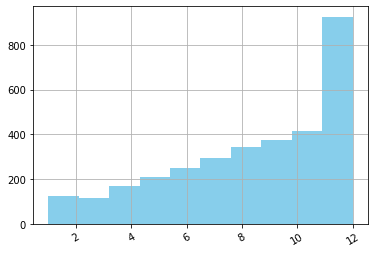

In [23]:
custom_hist(df['month'])

In [24]:
df[df['month'].isnull()]

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,50,15360,500,550,200,3,3


In [25]:
df = df[~df['month'].isnull()]
len(df)

3214

### calls_count

In [26]:
describe_columns(df, 'calls_count')

Пропуски: 40
Тип переменной: float64


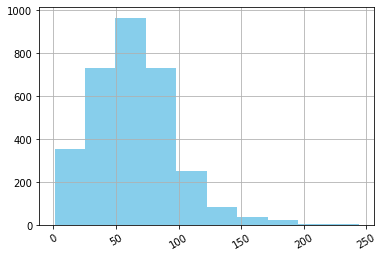

In [27]:
custom_hist(df['calls_count'])

In [28]:
df['calls_count'].describe()

count    3174.000000
mean       63.833333
std        32.678036
min         1.000000
25%        41.000000
50%        63.000000
75%        83.000000
max       244.000000
Name: calls_count, dtype: float64

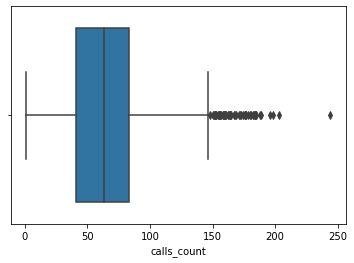

In [29]:
sns.boxplot(df['calls_count']);

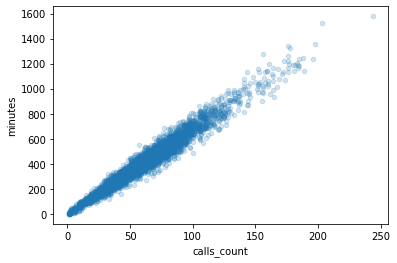

In [30]:
df.plot(x = 'calls_count', y = 'minutes', kind = 'scatter', alpha = 0.2)

In [31]:
df[df['calls_count'].isnull()].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
934,1476,4.0,NaN,NaN,NaN,530.78,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1
952,1091,5.0,NaN,NaN,30.0,10703.37,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
953,1091,6.0,NaN,NaN,30.0,10236.19,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
954,1091,7.0,NaN,NaN,35.0,16444.98,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
955,1091,8.0,NaN,NaN,31.0,12633.88,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1


In [32]:
stack = df[df['calls_count'].isnull()]
arr = stack['user_id'].unique()
tested_df = df[(~df['calls_count'].isnull()) & ((df['user_id'] == 1476) | (df['user_id'] == 1091) | (df['user_id'] == 1106) | (df['user_id'] == 1231) | (df['user_id'] == 1328) | (df['user_id'] == 1473) | (df['user_id'] == 1373) | (df['user_id'] == 1489))]

In [33]:
stack

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
934,1476,4.0,NaN,NaN,NaN,530.78,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1
952,1091,5.0,NaN,NaN,30.0,10703.37,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
953,1091,6.0,NaN,NaN,30.0,10236.19,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
954,1091,7.0,NaN,NaN,35.0,16444.98,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
955,1091,8.0,NaN,NaN,31.0,12633.88,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
956,1091,9.0,NaN,NaN,32.0,16597.11,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
957,1091,10.0,NaN,NaN,44.0,15644.73,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
958,1091,11.0,NaN,NaN,28.0,11864.25,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
959,1091,12.0,NaN,NaN,42.0,13280.45,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
960,1106,4.0,NaN,NaN,9.0,2923.49,67,NaN,Калуга,Исаак,Костин,2018-04-26,ultra,1000,30720,3000,1950,150,1,1


In [34]:
tested_df.head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
926,1476,5.0,71.0,434.12,7.0,21781.33,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1
927,1476,6.0,62.0,466.14,4.0,14623.29,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1
928,1476,7.0,65.0,463.16,3.0,15983.38,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1
929,1476,8.0,59.0,432.89,5.0,25106.38,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1
930,1476,9.0,72.0,593.06,5.0,18602.93,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1


In [35]:
tested_df.groupby('user_id').agg({'calls_count' : 'mean'})

,calls_count
user_id,
1373,2.181818
1476,68.625000


In [36]:
df[df['calls_count'].isnull()].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
934,1476,4.0,NaN,NaN,NaN,530.78,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1
952,1091,5.0,NaN,NaN,30.0,10703.37,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
953,1091,6.0,NaN,NaN,30.0,10236.19,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
954,1091,7.0,NaN,NaN,35.0,16444.98,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
955,1091,8.0,NaN,NaN,31.0,12633.88,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1


In [37]:
df.loc[(df['user_id'] == 1373) & (df['calls_count'].isnull()), 'calls_count'] = 2.181818
df.loc[(df['user_id'] == 1476) & (df['calls_count'].isnull()), 'calls_count'] = 68.625000

In [38]:
df[df['calls_count'].isnull()].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
952,1091,5.0,NaN,NaN,30.0,10703.37,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
953,1091,6.0,NaN,NaN,30.0,10236.19,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
954,1091,7.0,NaN,NaN,35.0,16444.98,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
955,1091,8.0,NaN,NaN,31.0,12633.88,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
956,1091,9.0,NaN,NaN,32.0,16597.11,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1


In [39]:
arr

array([1476, 1091, 1106, 1231, 1328, 1473, 1373, 1489])

In [40]:
df[df['calls_count'].isnull()].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
952,1091,5.0,NaN,NaN,30.0,10703.37,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
953,1091,6.0,NaN,NaN,30.0,10236.19,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
954,1091,7.0,NaN,NaN,35.0,16444.98,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
955,1091,8.0,NaN,NaN,31.0,12633.88,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
956,1091,9.0,NaN,NaN,32.0,16597.11,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1


In [41]:
df[(~df['calls_count'].isnull()) & (df['tariff'] == 'ultra')]['calls_count'].sort_values().median()

75.0

In [42]:
df[df['calls_count'].isnull()].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
952,1091,5.0,NaN,NaN,30.0,10703.37,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
953,1091,6.0,NaN,NaN,30.0,10236.19,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
954,1091,7.0,NaN,NaN,35.0,16444.98,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
955,1091,8.0,NaN,NaN,31.0,12633.88,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
956,1091,9.0,NaN,NaN,32.0,16597.11,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1


In [43]:
df.loc[(df['calls_count'].isnull()) & (df['tariff'] == 'ultra'), 'calls_count'] = 76.0

In [44]:
df[df['calls_count'].isnull()].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3210,1489,8.0,NaN,NaN,17.0,11050.56,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,9.0,NaN,NaN,32.0,17206.30,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,10.0,NaN,NaN,21.0,19559.44,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,11.0,NaN,NaN,20.0,17491.56,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1489,12.0,NaN,NaN,35.0,17322.51,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [45]:
df[(~df['calls_count'].isnull()) & (df['tariff'] == 'smart')]['calls_count'].sort_values().median()

60.0

In [46]:
df[df['calls_count'].isnull()].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3210,1489,8.0,NaN,NaN,17.0,11050.56,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,9.0,NaN,NaN,32.0,17206.30,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,10.0,NaN,NaN,21.0,19559.44,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,11.0,NaN,NaN,20.0,17491.56,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1489,12.0,NaN,NaN,35.0,17322.51,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [47]:
df[df['minutes'].isnull()].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
934,1476,4.0,68.625,NaN,NaN,530.78,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1
952,1091,5.0,76.000,NaN,30.0,10703.37,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
953,1091,6.0,76.000,NaN,30.0,10236.19,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
954,1091,7.0,76.000,NaN,35.0,16444.98,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
955,1091,8.0,76.000,NaN,31.0,12633.88,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1


In [48]:
df.loc[(df['calls_count'].isnull()) & (df['tariff'] == 'smart'), 'calls_count'] = 60

In [49]:
df[df['calls_count'].isnull()].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [50]:
df['calls_count'] = df['calls_count'].astype('int64')

In [51]:
df[df['minutes'].isnull()].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
934,1476,4.0,68,NaN,NaN,530.78,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1
952,1091,5.0,76,NaN,30.0,10703.37,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
953,1091,6.0,76,NaN,30.0,10236.19,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
954,1091,7.0,76,NaN,35.0,16444.98,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1
955,1091,8.0,76,NaN,31.0,12633.88,36,NaN,Набережные Челны,Вера,Суслова,2018-05-08,ultra,1000,30720,3000,1950,150,1,1


### minutes

In [52]:
describe_columns(df, 'minutes')

Пропуски: 40
Тип переменной: float64


In [53]:
df['minutes'].describe()

count    3174.000000
mean      431.250800
std       224.914227
min         0.000000
25%       273.835000
50%       420.715000
75%       558.602500
max      1578.060000
Name: minutes, dtype: float64

/Users/georgezagorsky/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/georgezagorsky/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


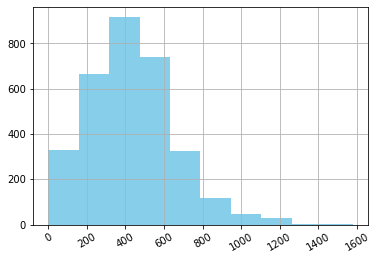

In [54]:
custom_hist(df['minutes']);

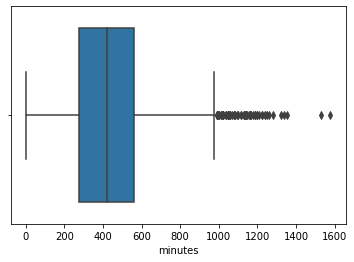

In [55]:
sns.boxplot(df['minutes']);

In [56]:
df[df['minutes'] > 1100].head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
43,1021,7.0,158,1135.06,103.0,20018.76,61,NaN,Краснодар,Святослав,Тихонов,2018-04-26,ultra,1000,30720,3000,1950,150,1,1
54,1028,12.0,143,1130.95,171.0,15790.18,20,NaN,Тверь,Рустем,Евсеев,2018-10-02,ultra,1000,30720,3000,1950,150,1,1
97,1060,12.0,184,1163.11,52.0,43931.36,46,NaN,Калуга,Яков,Рудаков,2018-11-24,ultra,1000,30720,3000,1950,150,1,1
113,1078,12.0,177,1197.53,NaN,26231.18,70,NaN,Волгоград,Харитон,Литвинов,2018-06-19,ultra,1000,30720,3000,1950,150,1,1
211,1124,10.0,152,1159.82,121.0,49745.69,54,NaN,Махачкала,Альбин,Андрианов,2018-09-24,ultra,1000,30720,3000,1950,150,1,1


In [57]:
df.head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22,150.06,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43,158.90,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47,318.80,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52,389.87,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58,440.14,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [58]:
df[(~df['minutes'].isnull()) & (df['tariff'] == 'ultra')]['minutes'].sort_values().median()

497.89

In [59]:
df.loc[(df['minutes'].isnull()) & (df['tariff'] == 'ultra'), 'minutes'] = 497.89

In [60]:
df[(~df['minutes'].isnull()) & (df['tariff'] == 'smart')]['minutes'].sort_values().median()

398.79

In [61]:
df.loc[(df['minutes'].isnull()) & (df['tariff'] == 'smart'), 'minutes'] = 398.79

In [62]:
df['minutes'].isna().mean()

0.0

### count_messages

In [63]:
describe_columns(df, 'count_messages')


Пропуски: 497
Тип переменной: float64


/Users/georgezagorsky/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/georgezagorsky/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


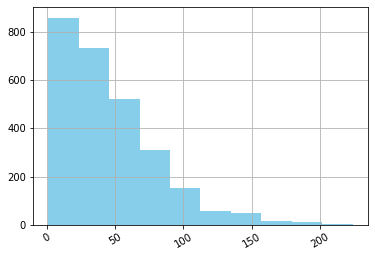

In [64]:
custom_hist(df['count_messages']);

In [65]:
df['count_messages'].describe()

count    2717.000000
mean       45.283769
std        35.051363
min         1.000000
25%        19.000000
50%        38.000000
75%        63.000000
max       224.000000
Name: count_messages, dtype: float64

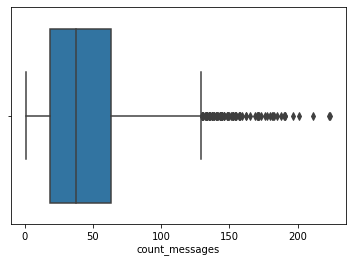

In [66]:
sns.boxplot(df['count_messages']);

In [67]:
df[df['count_messages'].isnull()].groupby('age', as_index = False).agg({'calls_count' : 'count'}).sort_values('age', ascending = False).head()

,age,calls_count
46,75,15
45,73,22
44,72,3
43,71,9
42,70,8


In [68]:
df[df['count_messages'].isnull()]

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
49,1024,10.0,7,76.22,NaN,3310.05,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,1000,30720,3000,1950,150,1,1
50,1024,11.0,157,1083.14,NaN,43107.47,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,1000,30720,3000,1950,150,1,1
51,1024,12.0,136,898.21,NaN,35948.13,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,1000,30720,3000,1950,150,1,1
67,1049,3.0,55,380.10,NaN,6195.54,41,NaN,Москва,Габриель,Ларин,2018-03-10,ultra,1000,30720,3000,1950,150,1,1
68,1049,4.0,76,501.56,NaN,5291.10,41,NaN,Москва,Габриель,Ларин,2018-03-10,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,1494,8.0,32,249.30,NaN,6590.75,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
3183,1494,9.0,66,469.48,NaN,16962.51,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
3184,1494,10.0,52,330.66,NaN,17767.24,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
3185,1494,11.0,63,389.17,NaN,18052.45,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3


In [69]:
df[(df['calls_count'] > 130) & (df['minutes'] > 800) & (df['count_messages'].isnull())]

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
50,1024,11.0,157,1083.14,NaN,43107.47,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,1000,30720,3000,1950,150,1,1
51,1024,12.0,136,898.21,NaN,35948.13,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,1000,30720,3000,1950,150,1,1
108,1078,7.0,167,1014.69,NaN,22432.58,70,NaN,Волгоград,Харитон,Литвинов,2018-06-19,ultra,1000,30720,3000,1950,150,1,1
110,1078,9.0,153,1039.08,NaN,22770.04,70,NaN,Волгоград,Харитон,Литвинов,2018-06-19,ultra,1000,30720,3000,1950,150,1,1
111,1078,10.0,151,999.37,NaN,25994.12,70,NaN,Волгоград,Харитон,Литвинов,2018-06-19,ultra,1000,30720,3000,1950,150,1,1
112,1078,11.0,141,1048.21,NaN,24091.32,70,NaN,Волгоград,Харитон,Литвинов,2018-06-19,ultra,1000,30720,3000,1950,150,1,1
113,1078,12.0,177,1197.53,NaN,26231.18,70,NaN,Волгоград,Харитон,Литвинов,2018-06-19,ultra,1000,30720,3000,1950,150,1,1
305,1185,5.0,136,944.78,NaN,31992.03,26,NaN,Санкт-Петербург,Мануэла,Родина,2018-04-13,ultra,1000,30720,3000,1950,150,1,1
332,1201,9.0,133,991.19,NaN,12196.55,32,2018-12-03,Москва,Геннадий,Веселов,2018-08-06,ultra,1000,30720,3000,1950,150,1,1
638,1360,5.0,137,869.90,NaN,10289.25,46,NaN,Санкт-Петербург,Лаура,Макарова,2018-03-18,ultra,1000,30720,3000,1950,150,1,1


In [70]:
# Я предположу что если у нас NaN при minutes > 1000 and minutes > 800 то теоретически возможно
# Что человек просто не пишет сообщения - заменим медианным значением по ультра

In [71]:
data = df[~df['count_messages'].isnull()]
median = data['count_messages'].sort_values().median()
df['count_messages'] = df['count_messages'].fillna(median)
median

38.0

In [72]:
df[df['count_messages'].isnull()]

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


In [73]:
df['count_messages'] = df['count_messages'].astype('int64')

### count_mb

/Users/georgezagorsky/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/georgezagorsky/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


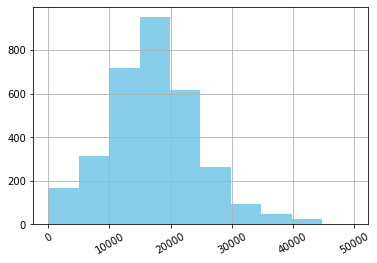

In [74]:
custom_hist(df['count_mb']);

In [75]:
describe_columns(df, 'count_mb')

Пропуски: 11
Тип переменной: float64


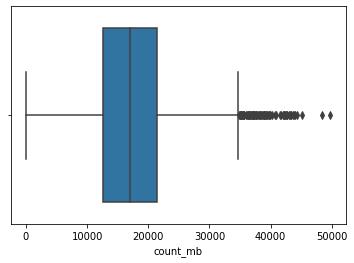

In [76]:
sns.boxplot(df['count_mb']);

In [77]:
df[df['count_mb'].isnull()]

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
451,1273,5.0,24,208.76,21,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
452,1273,6.0,40,215.89,38,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
453,1273,7.0,44,236.07,37,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
454,1273,8.0,53,229.98,41,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
455,1273,9.0,33,210.67,32,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
456,1273,10.0,40,295.10,35,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
457,1273,11.0,45,256.14,29,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
458,1273,12.0,41,241.59,39,NaN,46,NaN,Курган,Рэм,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
685,1377,2.0,23,168.55,2,NaN,59,NaN,Брянск,Альфред,Семин,2018-02-25,ultra,1000,30720,3000,1950,150,1,1
751,1392,2.0,2,11.96,3,NaN,54,2018-09-27,Челябинск,Алла,Беликова,2018-02-27,ultra,1000,30720,3000,1950,150,1,1


In [78]:
df['count_mb'] = df['count_mb'].fillna(0)
len(df)

3214

In [79]:
df['count_mb'].isna().mean()

0.0

In [80]:
df['count_mb'] = df['count_mb'] //  1024  + 1
df['count_mb'] = df['count_mb'].astype('int64')
df.head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22,150.06,22,3,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43,158.90,60,23,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47,318.80,75,14,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52,389.87,81,14,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58,440.14,57,15,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


### age

In [81]:
describe_columns(df, 'age')

Пропуски: 0
Тип переменной: int64


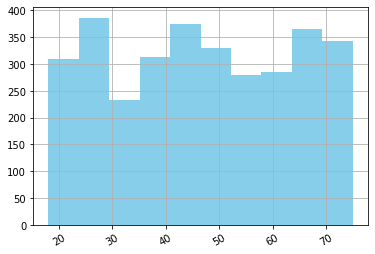

In [82]:
custom_hist(df['age'])

### churn_date


In [83]:
describe_columns(df, 'churn_date')

Пропуски: 3027
Тип переменной: object


In [84]:
df['churn_date'] = df['churn_date'].fillna(0)
df['churn_date'] = pd.to_datetime(df['churn_date'])
df.head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22,150.06,22,3,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,43,158.90,60,23,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,47,318.80,75,14,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,52,389.87,81,14,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,58,440.14,57,15,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [85]:
df.groupby('month', as_index = False).agg({'minutes' : 'count'}).sort_values('minutes', ascending = False)

,month,minutes
11,12.0,476
10,11.0,450
9,10.0,417
8,9.0,375
7,8.0,342
6,7.0,292
5,6.0,248
4,5.0,208
3,4.0,167
2,3.0,114


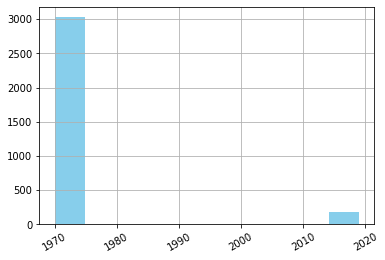

In [86]:
df['month'] = df['month'].astype('int64')
custom_hist(df['churn_date'])

### city

In [87]:
describe_columns(df, 'city')

Пропуски: 0
Тип переменной: object


### reg_date

In [88]:
describe_columns(df, 'reg_date')

Пропуски: 0
Тип переменной: object


In [89]:
df['reg_date'] = pd.to_datetime(df['reg_date'])

In [90]:
df.groupby(df['reg_date'].dt.month).agg({'minutes' : 'count'}).reset_index().sort_values('minutes', ascending = False)

,reg_date,minutes
0,1,508
3,4,474
1,2,418
4,5,324
2,3,320
5,6,274
6,7,259
7,8,247
8,9,138
9,10,134


In [91]:
df.head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,150.06,22,3,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,158.90,60,23,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,318.80,75,14,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,389.87,81,14,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,440.14,57,15,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3214
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
calls_count              3214 non-null int64
minutes                  3214 non-null float64
count_messages           3214 non-null int64
count_mb                 3214 non-null int64
age                      3214 non-null int64
churn_date               3214 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute

### помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


In [93]:
df['mb_per_month_included'] = df['mb_per_month_included'] / 1024
df.head()

,user_id,month,calls_count,minutes,count_messages,count_mb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,150.06,22,3,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
1,1000,6,43,158.90,60,23,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
2,1000,7,47,318.80,75,14,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
3,1000,8,52,389.87,81,14,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
4,1000,9,58,440.14,57,15,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1


In [94]:
def rename_columns(df : pd.DataFrame):
    return df.rename(columns = {'count_mb' : 'count_gb', 'mb_per_month_included' : 'gb_per_month_included'})

In [95]:
df = rename_columns(df)

In [96]:
df.head()

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,150.06,22,3,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
1,1000,6,43,158.90,60,23,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
2,1000,7,47,318.80,75,14,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
3,1000,8,52,389.87,81,14,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
4,1000,9,58,440.14,57,15,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1


In [97]:
df['bool_minutes'] = (df['minutes_included'] < df['minutes'])
df.loc[df['bool_minutes'] == True, 'bool_minutes'] = (df['minutes'] - df['minutes_included']) * df['rub_per_minute']
df.loc[df['bool_minutes'] == False, 'bool_minutes'] = np.nan
df['bool_minutes'] = df['bool_minutes'].fillna(0)

In [98]:
df['bool_gb'] = (df['gb_per_month_included'] < df['count_gb'])
df.loc[df['bool_gb'] == True, 'bool_gb'] = (df['count_gb'] - df['gb_per_month_included']) * df['rub_per_gb']
df.loc[df['bool_gb'] == False, 'bool_gb'] = np.nan
df['bool_gb'] = df['bool_gb'].fillna(0)
df[df['bool_gb'] != 0]

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,...,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bool_minutes,bool_gb
50,1024,11,157,1083.14,38,43,73,1970-01-01,Санкт-Петербург,Иулиан,...,ultra,1000,30.0,3000,1950,150,1,1,0.0,1950.0
51,1024,12,136,898.21,38,36,73,1970-01-01,Санкт-Петербург,Иулиан,...,ultra,1000,30.0,3000,1950,150,1,1,0.0,900.0
78,1050,7,35,196.35,52,35,44,2018-10-03,Тюмень,Рузана,...,ultra,1000,30.0,3000,1950,150,1,1,0.0,750.0
97,1060,12,184,1163.11,52,43,46,1970-01-01,Калуга,Яков,...,ultra,1000,30.0,3000,1950,150,1,1,0.0,1950.0
211,1124,10,152,1159.82,121,49,54,1970-01-01,Махачкала,Альбин,...,ultra,1000,30.0,3000,1950,150,1,1,0.0,2850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,1499,11,74,576.50,59,18,35,1970-01-01,Пермь,Гектор,...,smart,50,15.0,500,550,200,3,3,229.5,600.0
3211,1489,9,60,398.79,32,17,35,1970-01-01,Санкт-Петербург,Павел,...,smart,50,15.0,500,550,200,3,3,0.0,400.0
3212,1489,10,60,398.79,21,20,35,1970-01-01,Санкт-Петербург,Павел,...,smart,50,15.0,500,550,200,3,3,0.0,1000.0
3213,1489,11,60,398.79,20,18,35,1970-01-01,Санкт-Петербург,Павел,...,smart,50,15.0,500,550,200,3,3,0.0,600.0


In [99]:
df['bool_messages'] = (df['messages_included'] < df['count_messages'])
df.loc[df['bool_messages'] == True, 'bool_messages'] = (df['count_messages'] - df['messages_included']) * df['rub_per_message']
df.loc[df['bool_messages'] == False, 'bool_messages'] = np.nan
df['bool_messages'] = df['bool_messages'].fillna(0)
df[df['bool_messages'] != 0]

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,...,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bool_minutes,bool_gb,bool_messages
997,1005,3,77,573.54,56,11,67,1970-01-01,Набережные Челны,Афанасий,...,50,15.0,500,550,200,3,3,220.62,0.0,18
1001,1005,7,77,536.43,56,8,67,1970-01-01,Набережные Челны,Афанасий,...,50,15.0,500,550,200,3,3,109.29,0.0,18
1002,1005,8,71,586.79,64,8,67,1970-01-01,Набережные Челны,Афанасий,...,50,15.0,500,550,200,3,3,260.37,0.0,42
1003,1005,9,66,447.17,52,7,67,1970-01-01,Набережные Челны,Афанасий,...,50,15.0,500,550,200,3,3,0.00,0.0,6
1005,1005,11,75,523.34,51,13,67,1970-01-01,Набережные Челны,Афанасий,...,50,15.0,500,550,200,3,3,70.02,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1490,7,34,234.76,62,11,30,1970-01-01,Москва,Радомир,...,50,15.0,500,550,200,3,3,0.00,0.0,36
3198,1496,12,80,483.91,51,21,36,1970-01-01,Вологда,Трифон,...,50,15.0,500,550,200,3,3,0.00,1200.0,3
3203,1498,8,57,376.04,62,24,68,2018-10-25,Владикавказ,Всеволод,...,50,15.0,500,550,200,3,3,0.00,1800.0,36
3208,1499,11,74,576.50,59,18,35,1970-01-01,Пермь,Гектор,...,50,15.0,500,550,200,3,3,229.50,600.0,27


In [100]:
df.columns

Index(['user_id', 'month', 'calls_count', 'minutes', 'count_messages',
       'count_gb', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'messages_included', 'gb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'bool_minutes', 'bool_gb', 'bool_messages'],
      dtype='object')

In [101]:
df['result'] = df['bool_gb'] + df['bool_messages'] + df['bool_minutes'] + df['rub_monthly_fee']


In [102]:
df.head()

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bool_minutes,bool_gb,bool_messages,result
0,1000,5,22,150.06,22,3,52,1970-01-01,Краснодар,Рафаил,...,30.0,3000,1950,150,1,1,0.0,0.0,0,1950.0
1,1000,6,43,158.90,60,23,52,1970-01-01,Краснодар,Рафаил,...,30.0,3000,1950,150,1,1,0.0,0.0,0,1950.0
2,1000,7,47,318.80,75,14,52,1970-01-01,Краснодар,Рафаил,...,30.0,3000,1950,150,1,1,0.0,0.0,0,1950.0
3,1000,8,52,389.87,81,14,52,1970-01-01,Краснодар,Рафаил,...,30.0,3000,1950,150,1,1,0.0,0.0,0,1950.0
4,1000,9,58,440.14,57,15,52,1970-01-01,Краснодар,Рафаил,...,30.0,3000,1950,150,1,1,0.0,0.0,0,1950.0


Я бы хотел в этом моменте немного рассказать про свою логику. По условию высчитывания строчки мне показались максимально неправильными (конечно я признаю что теоретически я сделал тут не так как надо).

Во-первых там сказано разность между количеством звонов который даные и которые человек сделал. Такого я в таблице не нашел поэтому сделал именно разность по минутам, мне кажется что это правильно

Потом как я именно решил найти все это. Я проверял что если и правда значение которое нас инетерсует больше того которое дано по тарифу. То я ему давал True, в противном случае False. Я основывался на то что если человек взял 30 гб тариф а потратил 20, то не за что он платить не должен. Поэтому я просто в случае тру заполнял все сказанными значениями, в противном случае делал нанами и заполнял пропуски нулями. Как видно мой способ сработал

### Шаг 3. Проанализируйте данные

### Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [103]:
first_df = df[df['tariff'] == 'smart']
second_df = df[df['tariff'] == 'ultra']


In [104]:
df[(df['tariff'] == 'ultra') & (df['result'] > 1950)]

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bool_minutes,bool_gb,bool_messages,result
50,1024,11,157,1083.14,38,43,73,1970-01-01,Санкт-Петербург,Иулиан,...,30.0,3000,1950,150,1,1,0.0,1950.0,0,3900.0
51,1024,12,136,898.21,38,36,73,1970-01-01,Санкт-Петербург,Иулиан,...,30.0,3000,1950,150,1,1,0.0,900.0,0,2850.0
78,1050,7,35,196.35,52,35,44,2018-10-03,Тюмень,Рузана,...,30.0,3000,1950,150,1,1,0.0,750.0,0,2700.0
97,1060,12,184,1163.11,52,43,46,1970-01-01,Калуга,Яков,...,30.0,3000,1950,150,1,1,0.0,1950.0,0,3900.0
211,1124,10,152,1159.82,121,49,54,1970-01-01,Махачкала,Альбин,...,30.0,3000,1950,150,1,1,0.0,2850.0,0,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1231,9,76,497.89,188,33,63,1970-01-01,Чебоксары,Касьян,...,30.0,3000,1950,150,1,1,0.0,450.0,0,2400.0
974,1231,10,76,497.89,185,31,63,1970-01-01,Чебоксары,Касьян,...,30.0,3000,1950,150,1,1,0.0,150.0,0,2100.0
976,1231,12,76,497.89,191,32,63,1970-01-01,Чебоксары,Касьян,...,30.0,3000,1950,150,1,1,0.0,300.0,0,2250.0
978,1328,11,76,497.89,8,35,44,1970-01-01,Мурманск,Рауль,...,30.0,3000,1950,150,1,1,0.0,750.0,0,2700.0


In [105]:
df[(df['tariff'] == 'smart') & (df['result'] > 1950)]

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bool_minutes,bool_gb,bool_messages,result
1032,1009,7,22,171.96,14,25,24,1970-01-01,Пермь,Василиса,...,15.0,500,550,200,3,3,0.00,2000.0,0,2550.00
1033,1009,8,33,235.75,9,24,24,1970-01-01,Пермь,Василиса,...,15.0,500,550,200,3,3,0.00,1800.0,0,2350.00
1051,1011,11,65,475.08,12,25,44,1970-01-01,Самара,Веселина,...,15.0,500,550,200,3,3,0.00,2000.0,0,2550.00
1052,1011,12,58,336.29,6,23,44,1970-01-01,Самара,Веселина,...,15.0,500,550,200,3,3,0.00,1600.0,0,2150.00
1055,1012,5,43,297.21,10,26,38,1970-01-01,Санкт-Петербург,Варлам,...,15.0,500,550,200,3,3,0.00,2200.0,0,2750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,1496,8,88,497.78,41,23,36,1970-01-01,Вологда,Трифон,...,15.0,500,550,200,3,3,0.00,1600.0,0,2150.00
3195,1496,9,68,457.39,29,27,36,1970-01-01,Вологда,Трифон,...,15.0,500,550,200,3,3,0.00,2400.0,0,2950.00
3196,1496,10,72,426.65,35,28,36,1970-01-01,Вологда,Трифон,...,15.0,500,550,200,3,3,0.00,2600.0,0,3150.00
3197,1496,11,80,633.22,46,25,36,1970-01-01,Вологда,Трифон,...,15.0,500,550,200,3,3,399.66,2000.0,0,2949.66


## Анализ minutes in smart 

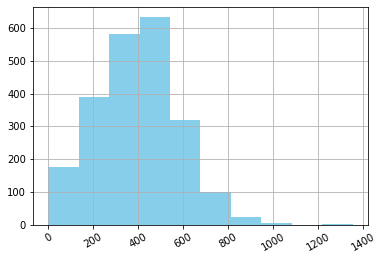

In [106]:
# 1) analysis of minutes 'smart'

custom_hist(first_df['minutes'])

Данное распределение напоминает нормальное, но справой части идет отклоненность от нормального

In [107]:
first_df['minutes'].describe() # mean = 395, std = 178

count    2229.000000
mean      395.500485
std       178.791324
min         0.000000
25%       268.790000
50%       398.790000
75%       515.070000
max      1354.220000
Name: minutes, dtype: float64

In [108]:
np.std(first_df['minutes'], ddof = 1)

178.79132380010063

In [109]:
np.var(first_df['minutes'], ddof = 1)

31966.337466192424

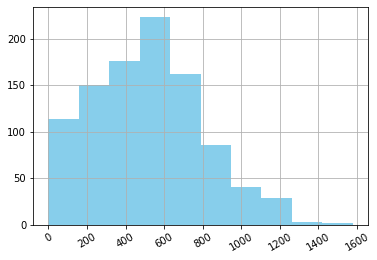

In [110]:
custom_hist(second_df['minutes'])

Данное распределение уже нельзя назвать нормальным, потому что слева и справа есть явные отклонения от нормальности

In [111]:
np.var(second_df['minutes'], ddof = 1)

81109.65605092073

In [112]:
np.std(second_df['minutes'], ddof = 1)

284.7975703037523

In [113]:
# Есть явные отличия между дисперсией и стандратным отклонениям двух выборок. Все очень просто
# В случае ультра там гораздо более высокие значения - вот и разброс слишком высокий

In [114]:
first_df['minutes'].mean()

395.5004845222073

In [115]:
second_df['minutes'].mean()

514.2542741116752

In [116]:
# НЕ сказал бы что между средними есть более выраженая разница - я хочу провести тест левеля

In [117]:
import scipy
scipy.stats.levene(first_df['minutes'], second_df['minutes'])

LeveneResult(statistic=278.64933547923715, pvalue=4.677535567718644e-60)

In [118]:
second_df['minutes'].mean()

514.2542741116752

В среднем люди с тарифом смарт нужно 400 минут разговор, а людям с тарифом ультра 500

## messages

In [119]:
first_df.head()

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bool_minutes,bool_gb,bool_messages,result
986,1001,11,59,408.12,38,18,41,1970-01-01,Москва,Иван,...,15.0,500,550,200,3,3,0.0,600.0,0,1150.0
987,1001,12,63,391.34,38,14,41,1970-01-01,Москва,Иван,...,15.0,500,550,200,3,3,0.0,0.0,0,550.0
988,1002,6,15,110.37,4,11,59,1970-01-01,Стерлитамак,Евгений,...,15.0,500,550,200,3,3,0.0,0.0,0,550.0
989,1002,7,26,204.75,11,18,59,1970-01-01,Стерлитамак,Евгений,...,15.0,500,550,200,3,3,0.0,600.0,0,1150.0
990,1002,8,42,269.71,13,20,59,1970-01-01,Стерлитамак,Евгений,...,15.0,500,550,200,3,3,0.0,1000.0,0,1550.0


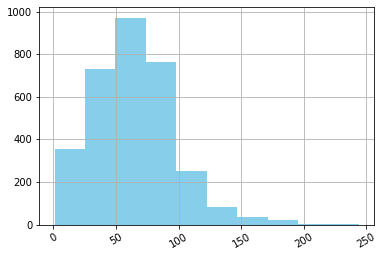

In [120]:
custom_hist(df['calls_count'])

In [121]:
# +- нормальное распределеление

In [122]:
first_df['calls_count'].describe()

count    2229.000000
mean       58.598923
std        25.789329
min         1.000000
25%        40.000000
50%        60.000000
75%        76.000000
max       198.000000
Name: calls_count, dtype: float64

In [123]:
first_df['calls_count'].mean()

58.59892328398385

In [124]:
np.var(first_df['calls_count'], ddof = 1)

665.0895141004854

In [125]:
np.std(first_df['calls_count'], ddof = 1)

25.78932946201753

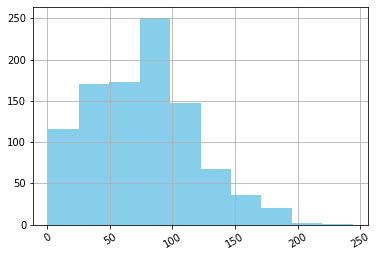

In [126]:
custom_hist(second_df['calls_count']) # Опять же нельзя это распределние нельзя назвать нормальным

In [127]:
np.var(second_df['calls_count'], ddof = 1)

1735.9816412859561

In [128]:
np.std(second_df['calls_count'], ddof = 1)

41.66511299979824

In [129]:
second_df['calls_count'].mean()

76.00812182741117

In [130]:
first_df['calls_count'].mean()

58.59892328398385

В среднем люди которые пользуются тарифом смарт делают порядка 60 звонок, а люди пользующиеся тарифом ультра порядка 76, не сказал бы что разница существенна, также как и в прошлом примере

## internet

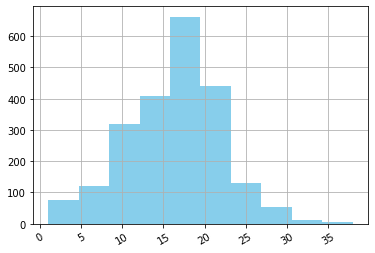

In [131]:
custom_hist(first_df['count_gb']) # Практически идеально нормально распределние

In [132]:
first_df['count_gb'].describe()

count    2229.000000
mean       16.329744
std         5.744588
min         1.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: count_gb, dtype: float64

In [133]:
np.var(first_df['count_gb'], ddof = 1)

33.000286334936966

In [134]:
np.std(first_df['count_gb'], ddof = 1)

5.74458756874129

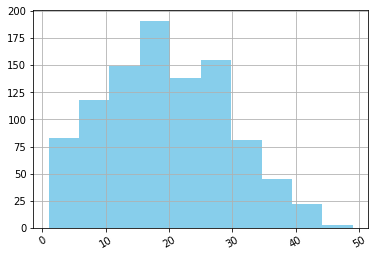

In [135]:
custom_hist(second_df['count_gb']) # Имеется 2 моды - оно скачет как хочет

In [136]:
second_df['count_gb'].describe()

count    985.000000
mean      19.505584
std        9.831932
min        1.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: count_gb, dtype: float64

In [137]:
np.var(second_df['count_gb'], ddof = 1)

96.66688952168708

In [138]:
np.std(second_df['count_gb'], ddof = 1)

9.831932135734414

Насколько мы видим разница всего на 3гб интернет трафика 16 и 19

## Проверим первую гипотезу средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;


Для данной проверки мы должны сравнить 2 выборки из двух генеральных совокупностей. То есть мы будем использовать scipy.stats.ttest_ind. Нулевую гипотезу поставим следующим образом

H0 - Средние двух генеральных совокупностей по выборкам будут равны

H1 - Средние двух генеральных совокупностей равны не будут.

alpha = 0.5

Если мы получим p value < 0.5 - мы сможем отвергнуть нулевую гипотезу

In [139]:
first = first_df[first_df['result'] > first_df['rub_monthly_fee']]['result']
second = second_df[second_df['result'] > second_df['rub_monthly_fee']]['result']
scipy.stats.ttest_ind(first, second, equal_var = False) 

Ttest_indResult(statistic=-23.525633969794992, pvalue=1.0294363785837325e-55)

In [140]:
first_df.head()

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bool_minutes,bool_gb,bool_messages,result
986,1001,11,59,408.12,38,18,41,1970-01-01,Москва,Иван,...,15.0,500,550,200,3,3,0.0,600.0,0,1150.0
987,1001,12,63,391.34,38,14,41,1970-01-01,Москва,Иван,...,15.0,500,550,200,3,3,0.0,0.0,0,550.0
988,1002,6,15,110.37,4,11,59,1970-01-01,Стерлитамак,Евгений,...,15.0,500,550,200,3,3,0.0,0.0,0,550.0
989,1002,7,26,204.75,11,18,59,1970-01-01,Стерлитамак,Евгений,...,15.0,500,550,200,3,3,0.0,600.0,0,1150.0
990,1002,8,42,269.71,13,20,59,1970-01-01,Стерлитамак,Евгений,...,15.0,500,550,200,3,3,0.0,1000.0,0,1550.0


p value оказался настолько мал что нам нет смысла рассматривать нулевую гипотезу в дальнейшем

## средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для обоснования данной гипотезы мы должны снова взять наш датафрейм и разделить на 2 части, но теперь мы будем проводить внутернний тест - scipy.stats.ttest_rel(). 

In [141]:
df.head()

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bool_minutes,bool_gb,bool_messages,result
0,1000,5,22,150.06,22,3,52,1970-01-01,Краснодар,Рафаил,...,30.0,3000,1950,150,1,1,0.0,0.0,0,1950.0
1,1000,6,43,158.90,60,23,52,1970-01-01,Краснодар,Рафаил,...,30.0,3000,1950,150,1,1,0.0,0.0,0,1950.0
2,1000,7,47,318.80,75,14,52,1970-01-01,Краснодар,Рафаил,...,30.0,3000,1950,150,1,1,0.0,0.0,0,1950.0
3,1000,8,52,389.87,81,14,52,1970-01-01,Краснодар,Рафаил,...,30.0,3000,1950,150,1,1,0.0,0.0,0,1950.0
4,1000,9,58,440.14,57,15,52,1970-01-01,Краснодар,Рафаил,...,30.0,3000,1950,150,1,1,0.0,0.0,0,1950.0


In [142]:
f_a = df[(df['city'] == 'Москва') & (df['result'] > df['rub_monthly_fee'])]
f_a

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bool_minutes,bool_gb,bool_messages,result
291,1180,3,13,103.03,16,37,27,1970-01-01,Москва,Лев,...,30.0,3000,1950,150,1,1,0.0,1050.0,0,3000.0
292,1180,4,10,69.79,14,31,27,1970-01-01,Москва,Лев,...,30.0,3000,1950,150,1,1,0.0,150.0,0,2100.0
293,1180,5,12,82.62,22,36,27,1970-01-01,Москва,Лев,...,30.0,3000,1950,150,1,1,0.0,900.0,0,2850.0
295,1180,7,15,90.62,17,34,27,1970-01-01,Москва,Лев,...,30.0,3000,1950,150,1,1,0.0,600.0,0,2550.0
296,1180,8,16,106.25,10,33,27,1970-01-01,Москва,Лев,...,30.0,3000,1950,150,1,1,0.0,450.0,0,2400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1490,7,34,234.76,62,11,30,1970-01-01,Москва,Радомир,...,15.0,500,550,200,3,3,0.0,0.0,36,586.0
3170,1490,8,45,328.49,50,17,30,1970-01-01,Москва,Радомир,...,15.0,500,550,200,3,3,0.0,400.0,0,950.0
3172,1490,10,42,290.90,45,21,30,1970-01-01,Москва,Радомир,...,15.0,500,550,200,3,3,0.0,1200.0,0,1750.0
3173,1490,11,38,265.97,47,19,30,1970-01-01,Москва,Радомир,...,15.0,500,550,200,3,3,0.0,800.0,0,1350.0


In [143]:
s_a = df[(df['city'] !='Москва') & (df['result'] > df['rub_monthly_fee'])]
s_a

,user_id,month,calls_count,minutes,count_messages,count_gb,age,churn_date,city,first_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,bool_minutes,bool_gb,bool_messages,result
50,1024,11,157,1083.14,38,43,73,1970-01-01,Санкт-Петербург,Иулиан,...,30.0,3000,1950,150,1,1,0.0,1950.0,0,3900.0
51,1024,12,136,898.21,38,36,73,1970-01-01,Санкт-Петербург,Иулиан,...,30.0,3000,1950,150,1,1,0.0,900.0,0,2850.0
78,1050,7,35,196.35,52,35,44,2018-10-03,Тюмень,Рузана,...,30.0,3000,1950,150,1,1,0.0,750.0,0,2700.0
97,1060,12,184,1163.11,52,43,46,1970-01-01,Калуга,Яков,...,30.0,3000,1950,150,1,1,0.0,1950.0,0,3900.0
211,1124,10,152,1159.82,121,49,54,1970-01-01,Махачкала,Альбин,...,30.0,3000,1950,150,1,1,0.0,2850.0,0,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1499,12,69,465.16,66,13,35,1970-01-01,Пермь,Гектор,...,15.0,500,550,200,3,3,0.0,0.0,48,598.0
3211,1489,9,60,398.79,32,17,35,1970-01-01,Санкт-Петербург,Павел,...,15.0,500,550,200,3,3,0.0,400.0,0,950.0
3212,1489,10,60,398.79,21,20,35,1970-01-01,Санкт-Петербург,Павел,...,15.0,500,550,200,3,3,0.0,1000.0,0,1550.0
3213,1489,11,60,398.79,20,18,35,1970-01-01,Санкт-Петербург,Павел,...,15.0,500,550,200,3,3,0.0,600.0,0,1150.0


In [144]:
results = st.ttest_rel(
    f_a['result'][:300], 
    s_a['result'][:300])
results.pvalue

1.5128650845615552e-06

Данную гипотезу мы тоже отвергаем. То есть в Москве средняя выручка больше.

# ВЫВОД

1) На первом этапе работы мы отработали с мерджином датасетов 

2) На втором этапе мы изучали каждый стоолбец по отдельности, в ходе которого были найдены пробелы в столбце month, которые мы удалили. В столбце calls_count и minutes тоже были найдены пропуски которые были заполненые одновременно медианным значением, с учетом заранее заполненных из средних прошлых месяцев. Пропуски в count_messages мы расценили как отуствие сообщение как ошибку парсера - поэтому заполнили медианным значением по ультра. Само собой приводя все типы данных. На этапе работы с мегабайтами мы перевели все в гигабайты. Основные пропуски мы заполнили нулями

3) Посчитали количество сделанных звонков и израсходованных минут разговора по месяцам;

4) Посчитали количество отправленных сообщений по месяцам;

5) Посчитали объем израсходованного интернет-трафика по месяцам;

6) помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану). - посчитали своим способом, теперь я точно понимаю что что-то сделал не так

7) Мы описали поведения клиентов на двух разных выборкам и как по мне произршел парадокс. Все значения были умеренно друг у друга, но при этом стандартное отклонение по выборкам и дисперсии улетали куда-то в космос. Думаю я просто неправильно применил формулу расчета. Получается что средние по количеству минут +- равны 400 и по 500 минут. Не сказал бы что есть значимая разница. Также распределения этих параметров напоминало нормальное. С интернетом такого точно не было. Не считая того что среднние там отличаются на 3гб(что в реальиях интернета копейки), распределения были полностью разыне, в тарифе ультра оно было просто плавающим с двумя модами.

8) Мы проверили 2 гипотезы. Первая гласит о том что дняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Наше p-value получилось слишком низким, тем самым мы смогли спокойно отвергнуть нулевую гипотезу прмиеним двусторонний тест

9) Во второй гипотезе мы проверяли выручку между Москвой и Регионами на одной генеральной совокупности, поэтому и применяемый тест был другим. Но p-value тоже получился слишком низким для того чтобы принимать эту гипотезу


# P.S

Совсем не понял на самом деле в каком моменте я допустил критичную ошибку. Когда я заметил слишком большую разницу в выборках перед тестами, было очевидно что здесь ничего не получится, только психи берут от этого проекта) Самое обидное будет если я допустил ошибку в самом начале. С учетом того что я всегда неплохо понимал мат статистику, в реалиях этого проекта ничего реализовать не получиось, себе ставлю 0 баллов)